<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
df=pd.read_csv('/content/sample_data/data_banknote_authentication.csv')
color=[]
value='green'
value2='red'
for i in range(len(df)):
    if df['class'][i] == 0:
      color.append(value)
    elif df['class'][i] == 1:
        color.append(value2)
print(color)
df["color"]= color
df

#method2
df['colour'] = np.where(df['class']== 0 , 'green', 'red')
df

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 

,variance,skewness,curtosis,entropy,class,color,colour
0,3.62160,8.66610,-2.8073,-0.44699,0,green,green
1,4.54590,8.16740,-2.4586,-1.46210,0,green,green
2,3.86600,-2.63830,1.9242,0.10645,0,green,green
3,3.45660,9.52280,-4.0112,-3.59440,0,green,green
4,0.32924,-4.45520,4.5718,-0.98880,0,green,green
...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,red,red
1368,-1.38870,-4.87730,6.4774,0.34179,1,red,red
1369,-3.75030,-13.45860,17.5932,-2.77710,1,red,red
1370,-3.56370,-8.38270,12.3930,-1.28230,1,red,red


In [72]:
from sklearn.neighbors import KNeighborsRegressor
acc=[]
K_val = [1,3,5,7,9,11]
#X,Y - Separating the dependent and independent variable
for k in K_val:
    X = df[["variance","skewness","curtosis", "entropy"]].values
    Y = df[['color']].values
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)
  
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train ,Y_train)

    prediction = knn_classifier.predict(X_test)

    cf = confusion_matrix(Y_test, prediction) #x_test used to predict,to see how good prediction is we compare w/ y_test
    # tp = cf[0][0]
    # fn = cf[0][1]
    # fp = cf[1][0]
    # tn = cf[1][1]
    # accur = (tp + tn) / (tp + tn + fp + fn)
    accur = (cf[0][0] + cf[1][1]) / (cf[0][0] + cf[1][1] + cf[1][0] + cf[0][1])
    acc.append(accur) #append all values in the list for plotting
acc
# accuracy.append(1- np.mean(prediction != Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.9970845481049563,
 0.9985422740524781,
 0.9985422740524781,
 0.9985422740524781,
 0.9956268221574344,
 0.9868804664723032]

Optimum value k* of k:  3


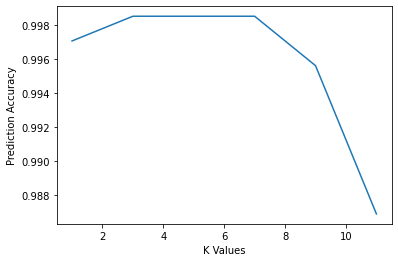

In [78]:
#plot a graph showing the accuracy. On x axis you plot k& on y-axis you plot accuracy.What is the optimal value k* of k?

# for optim  value:take min of error rate OR max accuray, min of error rate=max accuray

# error_rate = []
# error_rate.append(np.mean(pred_k != y_test))
plt.plot(K_val, acc)
plt.xlabel('K Values')
plt.ylabel('Prediction Accuracy')
K_optimum = K_val[pd.Series(acc).idxmax()]
print("Optimum value k* of k: ", K_optimum)


In [83]:
#use the optimal value k to compute performance measures&summarize them in the table
X = df[["variance","skewness","curtosis", "entropy"]].values
Y = df[['color']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=K_optimum)
knn_classifier.fit(X_train ,Y_train)

KOpt_scaled_on_test = scaler.transform(X_test) 
prediction = knn_classifier.predict(KOpt_scaled_on_test)

labels = ['green' , 'red']
cf = confusion_matrix(Y_test, prediction) #x_test used to predict,to see how good prediction is we compare w/ y_test
cf = confusion_matrix(Y_test , prediction)
cf_df = pd.DataFrame(confusion_matrix(Y_test , prediction, labels = ['red' , 'green']),
                  index=['true:green', 'true:red'], 
                  columns=['pred:green', 'pred:red'])

print("confusion matrix: considering green is + \n",  cf)   
tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
print("TP=", tp,"    FP=",  fp,"    FN=",  fn,"   TN=",  tn)

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn) / (tp + tn + fp + fn)
print("TPR=", tpr, "    TNR=", tnr, "    ACC=", acc)


confusion matrix: considering green is + 
 [[ 29 352]
 [  0 305]]
TP= 29     FP= 0     FN= 352    TN= 305
TPR= 0.07611548556430446     TNR= 1.0     ACC= 0.4868804664723032


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Classifier is worse (0.48% accuracy) than simple classifier = 83% accuracy.

 x that contains the last 4 digits of your BUID as feature values. What is the class label predicted for this bill by your simple classifier? What is the label for this bill predicted by k-NN using the best k∗?bill by your simple classifier? What is the label for this bill predicted by k-NN using the best k∗?

In [93]:
#take your best value k∗. For each of the four features f1,...,f4, generate new Xtest and Xtrain and drop that feature from both Xtrain and Xtest. 
X = df[["variance","skewness","curtosis", "entropy"]].values
X1 = df[["skewness","curtosis", "entropy"]].values #f1 is missing
X2 = df[["variance","curtosis", "entropy"]].values #f2 missing
X3 = df[["variance","skewness", "entropy"]].values #just f3 missing
X4 = df[["variance","skewness","curtosis"]].values #just f4 is missing
Y = df[["colour"]].values
X_train,X_test,X1_train,X1_test,X2_train,X2_test,X3_train,X3_test,X4_train,X4_test,Y_train,Y_test = train_test_split(X,X1,X2,X3,X4,Y,test_size = 0.5)
scaler = StandardScaler()

#train your classifier on the ”truncated” Xtrain and predict labels on Xtest using just 3 remaining features.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=K_optimum)
knn_classifier.fit(X_train ,Y_train)
prediction = knn_classifier.predict(X_test)
cf = confusion_matrix(Y_test , prediction)
tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
X_accuracy= round(100*(tp + tn)/(tp + tn + fp + fn), 2)
print("Accuracy of KNN",X_accuracy)

scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)
knn_classifier = KNeighborsClassifier(n_neighbors= K_optimum)
knn_classifier.fit(X1_train ,Y_train)

prediction = knn_classifier.predict(X1_test)
cf = confusion_matrix(Y_test , prediction)
tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
X1_accuracy = round(100*(tp + tn)/(tp + tn + fp + fn) , 2)
print("Accuracy of knn,f1 missing: ", X1_accuracy, "%")
print("Loss in accuracy due to dropping f1: ", round(X_accuracy-X1_accuracy, 2))

prediction = knn_classifier.predict(X2_test)
cf = confusion_matrix(Y_test , prediction)
tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
X2_accuracy = round(100*(tp + tn)/(tp + tn + fp + fn) , 2)
print("Accuracy of knn,f2 missing: ", X2_accuracy, "%")
print("Loss in accuracy due to dropping f2: ", round(X_accuracy-X2_accuracy, 2))

prediction = knn_classifier.predict(X3_test)
cf = confusion_matrix(Y_test , prediction)
tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
X3_accuracy = round(100*(tp + tn)/(tp + tn + fp + fn) , 2)
print("Accuracy of knn,f3 missing: ", X3_accuracy, "%")
print("Loss in accuracy due to dropping f3: ", round(X_accuracy-X3_accuracy, 2))

prediction = knn_classifier.predict(X4_test)
cf = confusion_matrix(Y_test , prediction)
tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
X4_accuracy = round(100*(tp + tn)/(tp + tn + fp + fn) , 2)
print("Accuracy of knn,f4 missing: ", X4_accuracy, "%")
print("Loss in accuracy due to dropping f4: ", round(X_accuracy-X4_accuracy, 2))

Accuracy of KNN 99.85
Accuracy of knn,f1 missing:  96.5 %
Loss in accuracy due to dropping f1:  3.35
Accuracy of knn,f2 missing:  79.3 %
Loss in accuracy due to dropping f2:  20.55
Accuracy of knn,f3 missing:  62.68 %
Loss in accuracy due to dropping f3:  37.17
Accuracy of knn,f4 missing:  58.45 %
Loss in accuracy due to dropping f4:  41.4


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


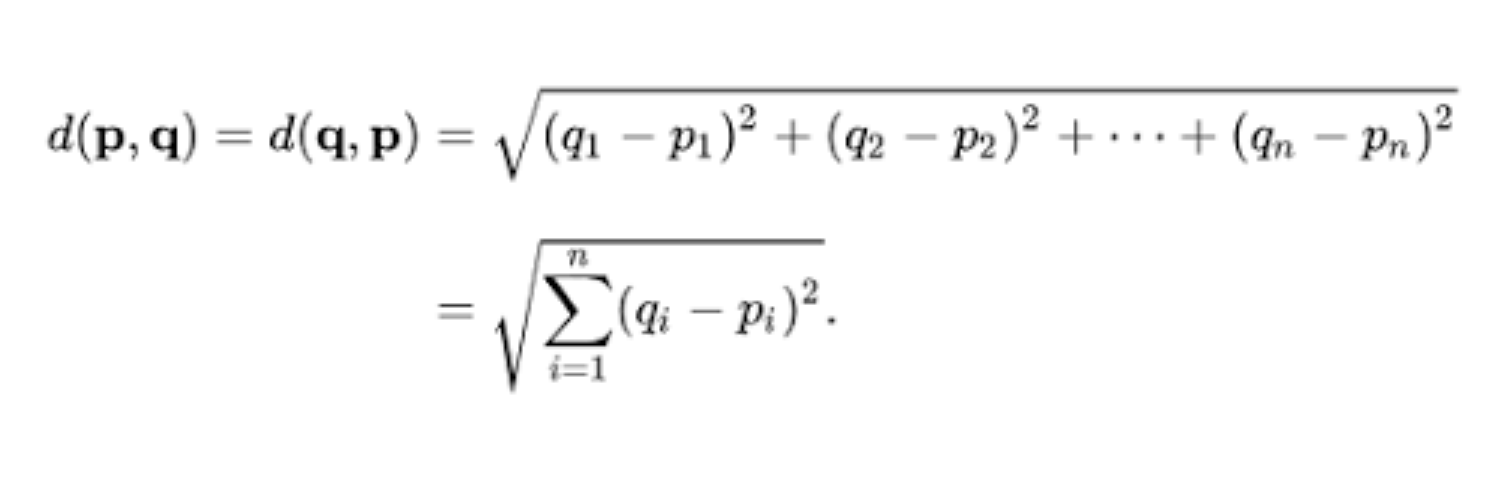

KNN used in finance, healthcare, political science, handwriting detection, image recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

k-nn and logistic re-gression classiers to detect "fake" banknotes and analyze the comparative importance of features in predicting accuracy.

KNN:supervised, non-ponametric(no assumpsution about distribuation) calssifier a mean/average method for for predicting values & labels.In retail is used for price estimate. Cant be used in large datasets. we need and Distance(nuclidean, manhattan, cosine,..) KNN regression algorithms.